# Book Recommander System

This project aims to develop a book recommendation system using a dataset sourced from Kaggle, consisting of rich demographic information from 278,858 anonymized users along with their explicit or implicit ratings of 1,149,780 books available on the Book Crossing website. With a vast repository of user interactions and book metadata, this dataset offers a fertile ground for exploring various recommendation algorithms and techniques.

Throughout this project, we will employ a combination of data preprocessing, feature engineering, and machine learning techniques to extract meaningful insights from the dataset. We will explore algorithms such as matrix factorization, nearest neighbor methods, and deep learning architectures to model user preferences and predict book recommendations accurately.

Ultimately, the success of this project lies in its ability to enhance user engagement and satisfaction by delivering relevant and compelling book recommendations. By harnessing the power of data science and machine learning, we aim to empower users with the tools they need to discover, explore, and enjoy a world of literature suited to their individual interests and preferences.

## Data Preprocessing

We will start this project by first reading the dataset and then performing some data cleaning by dealing with any missing values, duplicates, outliers and any overall issue the data could have and make it suitable for our analysis.

In [1501]:
import pandas as pd

In [1502]:
dataset = pd.read_csv('/Users/khawl/Desktop/Preprocessed_data.csv')
dataset.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [1503]:
dataset.shape

(1031175, 19)

Here we can see that the dataset is composed by 19 columns and 1031175 rows.
The rows represent random users and the columns represent a collection of information on books and on the users of those books.

This dataset can be considered relatively large which can be pretty beneficial to our project. A larger dataset provides more user-item interactions, enabling the recommender system to capture a more comprehensive understanding of user preferences and item characteristics. This allows for more accurate and personalized recommendations tailored to individual user tastes.

Now let's start datapreprocessing by first removing the variables that seem to give little to no valuable information to our project:

In [1504]:
# using .drop(columns=[]) method to remove the unnecessary variables and then reading the data a second time
dataset = dataset.drop(columns=['Unnamed: 0','location','isbn','img_s','img_m','img_l'])
dataset.head()

,user_id,age,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
0,2,18.0000,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,8,34.7439,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,11400,49.0000,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,11676,34.7439,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,41385,34.7439,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


I have removed the "unnamed:0" column because it serves in assigning an index to each row in the data but since pandas already automatically assigns a default index to each row, it is unnecessary to have it. I also removed the "location" column because we already have the columns "country","state" and"city" that give the same information. 

I then removed the "img_s" and "img_m" and "img_l" because i don't need them either.

I can notice some inconsistencies in the writing as some columns have capital letters and some don't, I will just capitalize the whole dataset. 

In [1505]:
# I started by capitalizing the names of the columns using the .str.capitalize() method on the columns of the dataset
dataset.columns = dataset.columns.str.capitalize()
# Then I capitalized each entry in the dataset using applymap() function such that it used .capitalize method on each entry in 
# the dataset only if it is a string
dataset = dataset.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)
dataset.head()

,User_id,Age,Rating,Book_title,Book_author,Year_of_publication,Publisher,Summary,Language,Category,City,State,Country
0,2,18.0000,0,Classical mythology,Mark p. o. morford,2002.0,Oxford university press,Provides an introduction to classical myths pl...,En,['social science'],Stockton,California,Usa
1,8,34.7439,5,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Timmins,Ontario,Canada
2,11400,49.0000,0,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Ottawa,Ontario,Canada
3,11676,34.7439,8,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],NaN,NaN,NaN
4,41385,34.7439,0,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Sudbury,Ontario,Canada


### Missing Values

Let's now try looking for missing values and if any, find out what insights they give us on the dataset and figure out how to deal with them.

In [1506]:
# I used the .isna() method to detect the missing values in the dataset
# and then I paired it with .sum() method to calculate the number of missing values detected 
# and I proceeded to store them in a variable
missing_values = dataset.isna().sum() 

print("Number of missing values in each column:")
print(missing_values)

# I used the .sum() method to calculate the total number of missing values in the dataset
total_missing_values = missing_values.sum()
# I used the .shape[0] method to get the total number of rows in the Dataset
total_entries = dataset.shape[0]*dataset.shape[1]
# Then I calculated the percentage using the two variables above 
percentage_missing_values = (total_missing_values / total_entries) * 100

print("Percentage of missing values in the dataset:")
print(percentage_missing_values)

Number of missing values in each column:
User_id                    0
Age                        0
Rating                     0
Book_title                 0
Book_author                0
Year_of_publication        0
Publisher                  0
Summary                    0
Language                   0
Category                   0
City                   14103
State                  22798
Country                35374
dtype: int64
Percentage of missing values in the dataset:
0.5391534302727844


Clearly, 0.5% of the dataset is composed of missing values, which seems to be a relatively low number.

We can also notice that all of the missing values are related to demographics, this could potentially tell us that it was a bit complicated for the practionners to collect the location of the users, or maybe some of the users simply decided not to give out that information and wanted to stay completely anonymous. 

Let's investigate this further using a heatmap: 

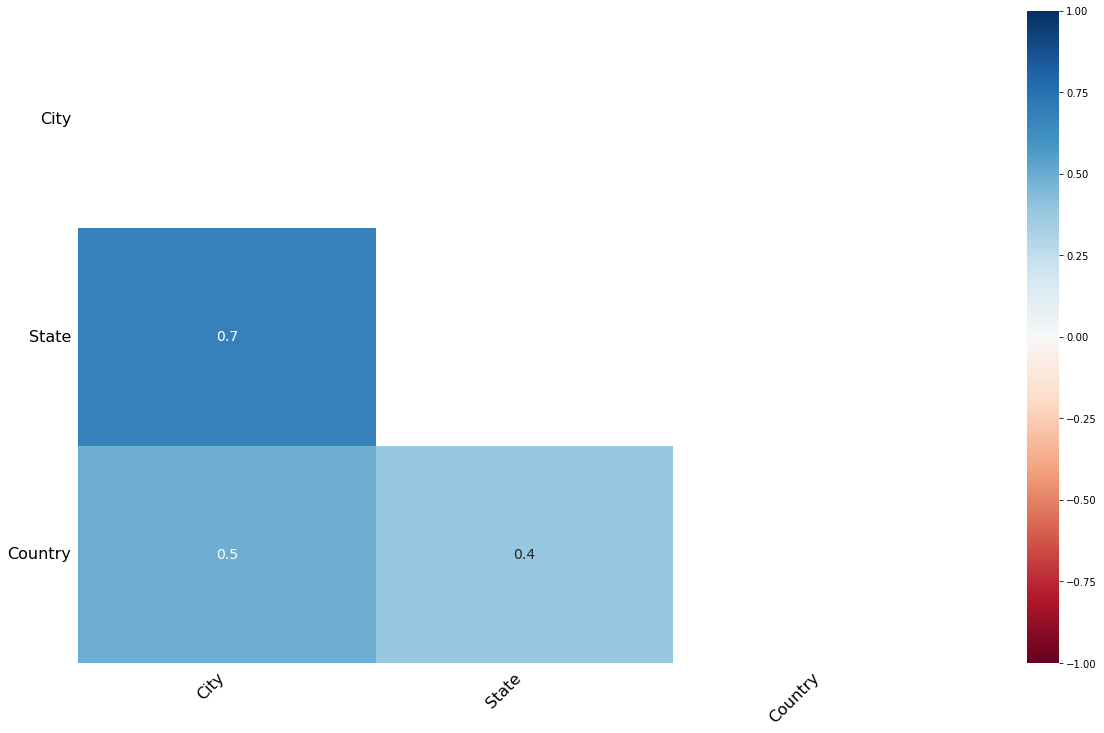

In [1507]:
import missingno as msno
import matplotlib.pyplot as plt

# Plot missing values heatmap
msno.heatmap(dataset)
plt.show()

This heatmap helps us figure out the correlation of the missigness in the variables. 

For example, the value of 0.7 on top suggests that there is a relatively high correlation between missingness in the "state" variable and missingness in the "city" variable. In other words, when "state" is missing, there's a 70% chance that "city" is also missing, and vice versa.. 

 This correlation may suggest that there's some underlying relationship or dependency between the missing values in "city" and "state". Obviously, since these variables are purely geographical information this points to potential data collection issues or challenges. For example, if certain regions or locations were difficult to capture or if there were inconsistencies in data collection procedures.

Before dealing with them, let's see if there aren't any other forms of missing values in the dataset: 

In [1508]:
dataset.head()

,User_id,Age,Rating,Book_title,Book_author,Year_of_publication,Publisher,Summary,Language,Category,City,State,Country
0,2,18.0000,0,Classical mythology,Mark p. o. morford,2002.0,Oxford university press,Provides an introduction to classical myths pl...,En,['social science'],Stockton,California,Usa
1,8,34.7439,5,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Timmins,Ontario,Canada
2,11400,49.0000,0,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Ottawa,Ontario,Canada
3,11676,34.7439,8,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],NaN,NaN,NaN
4,41385,34.7439,0,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Sudbury,Ontario,Canada


In [1509]:
dataset.tail()

,User_id,Age,Rating,Book_title,Book_author,Year_of_publication,Publisher,Summary,Language,Category,City,State,Country
1031170,278851,33.0,0,As hogan said . . . : the 389 best things anyo...,Randy voorhees,2000.0,Simon & schuster,Golf lovers will revel in this collection of t...,En,['humor'],Dallas,Texas,Usa
1031171,278851,33.0,5,All elevations unknown: an adventure in the he...,Sam lightner,2001.0,Broadway books,A daring twist on the travel-adventure genre t...,En,['nature'],Dallas,Texas,Usa
1031172,278851,33.0,7,Why stop?: a guide to texas historical roadsid...,Claude dooley,1985.0,Lone star books,9,9,9,Dallas,Texas,Usa
1031173,278851,33.0,7,The are you being served? stories: 'camping in...,Jeremy lloyd,1997.0,Kqed books,These hilarious stories by the creator of publ...,En,['fiction'],Dallas,Texas,Usa
1031174,278851,33.0,10,"Dallas street map guide and directory, 2000 ed...",Mapsco,1999.0,American map corporation,9,9,9,Dallas,Texas,Usa


Here we can see that there are columns that contain a strange number "9" throughout the whole dataset. Since it doesn't seem to be a reference number to some value, it is probably an erroneous or placeholder value that signify missing data due to data entry errors, system glitches, or simple missing data.
Since pandas is not build to automatically detect this type of missing data let's replace this 9 values with NaN values.

In [1510]:
# I used the replace() function to replace the 9 values with NaN values
dataset.replace("9", pd.NA, inplace=True)


Now let's recalculate the percentage of missing values in the dataset after adding the new missing values found: 

In [1511]:
# I recalculated the number of missing values after adding the new "9" missing values
missing_values = dataset.isna().sum() 
print("Number of missing values in each column:")
print(missing_values)

# I used the .sum() method to calculate the total number of missing values in the dataset
total_missing_values = missing_values.sum()
# I used the .shape[] method to get the total number of rows in the Dataset
total_entries = dataset.shape[0]*dataset.shape[1]
# Then I calculated the percentage using the two variables above 
percentage_missing_values = (total_missing_values / total_entries) * 100

print("Percentage of missing values in the dataset:")
print(percentage_missing_values)

Number of missing values in each column:
User_id                     0
Age                         0
Rating                      0
Book_title                  0
Book_author                 0
Year_of_publication         0
Publisher                   0
Summary                398937
Language               398937
Category               406102
City                    14103
State                   22798
Country                 35374
dtype: int64
Percentage of missing values in the dataset:
9.52051337999407


As expected, the percentage increased a lot more and went from 0.5% to 9.5% of missing values.
Like before, let's investigate the correlation of missingness using a heatmap.

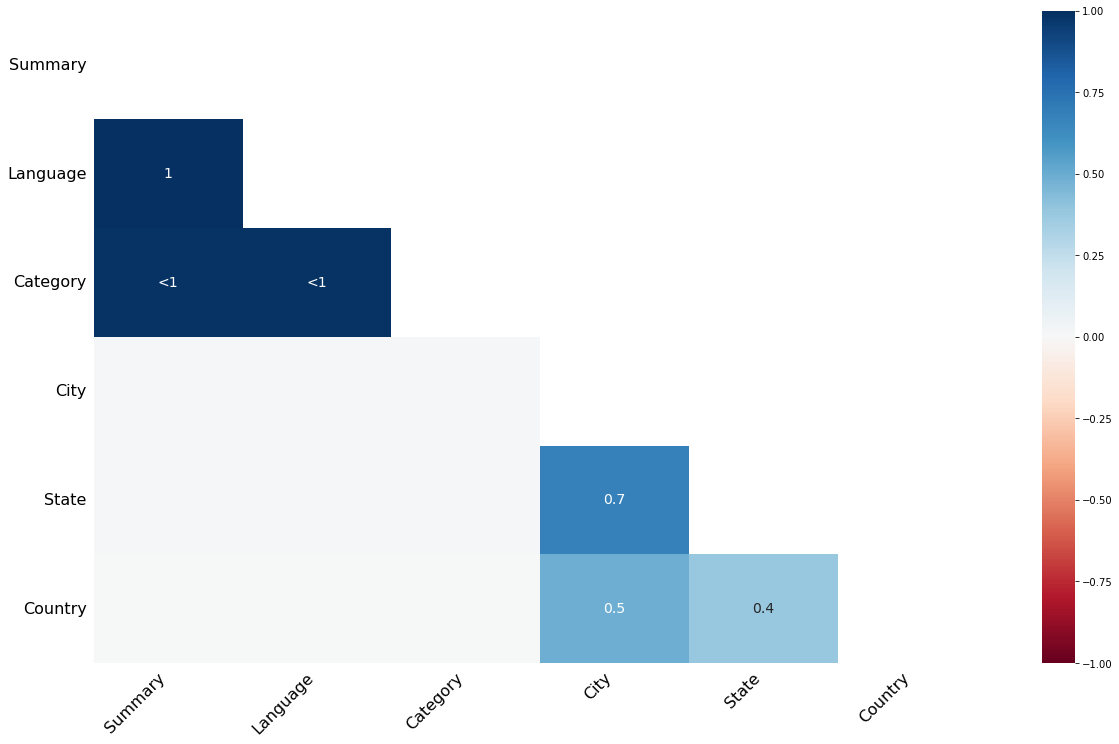

In [1512]:
# Plot missing values heatmap
msno.heatmap(dataset)
plt.show()

Now, we can see a new cluster of extremely high correlation of missingness between the "category" language" and "summary" variables. 
After looking at the dataset documentation, I noticed that these exact three variables were only recently added to this dataset and weren't part of the older versions, which explains the high correlation between them since there were part of single data collection process, and the big number of missing values is probably due to the fact that this data is still not in the final version of the dataset and is still being collected. 


Let's print out some of the rows with missing values to continue our search and see if there isn't any other strange data entries that could potentially be another type of missing values

In [1513]:
# Create a boolean mask to identify rows with missing values
mask = dataset.isnull().any(axis=1)

# Use the boolean mask to filter and display the rows with missing values
rows_with_missing_values = dataset[mask]
rows_with_missing_values.head()

,User_id,Age,Rating,Book_title,Book_author,Year_of_publication,Publisher,Summary,Language,Category,City,State,Country
3,11676,34.7439,8,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],NaN,NaN,NaN
8,116866,34.7439,9,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Ottawa,",",NaN
31,11676,34.7439,9,The kitchen god's wife,Amy tan,1991.0,Putnam pub group,A chinese immigrant who is convinced she is dy...,En,['fiction'],NaN,NaN,NaN
40,115097,27.0000,7,The kitchen god's wife,Amy tan,1991.0,Putnam pub group,A chinese immigrant who is convinced she is dy...,En,['fiction'],Seattle,",",NaN
58,245827,34.7439,9,The kitchen god's wife,Amy tan,1991.0,Putnam pub group,A chinese immigrant who is convinced she is dy...,En,['fiction'],Albuquerque,",",NaN


Here we can see that in some rows, a missing value is also represented as a comma. 
Let's replace the commas with NaN values too

In [1514]:
# Replace single commas with NaN values if they are standalone
dataset = dataset.replace('^,|,$', np.nan, regex=True)

Now i can recalculate the final number of missing values in the dataset: 

In [1515]:
# I recalculated the number of missing values after adding the new "," missing values
missing_values = dataset.isna().sum() 
print("Number of missing values in each column:")
print(missing_values)

# I used the .sum() method to calculate the total number of missing values in the dataset
total_missing_values = missing_values.sum()
# I used the .shape[] method to get the total number of rows in the Dataset
total_entries = dataset.shape[0]*dataset.shape[1]
# Then I calculated the percentage using the two variables above 
percentage_missing_values = (total_missing_values / total_entries) * 100

print("Percentage of missing values in the dataset:")
print(percentage_missing_values)

Number of missing values in each column:
User_id                     0
Age                         0
Rating                      0
Book_title                221
Book_author                 0
Year_of_publication         0
Publisher                   4
Summary                399042
Language               398937
Category               406102
City                    14839
State                   47184
Country                 35439
dtype: int64
Percentage of missing values in the dataset:
9.71086382039906


The percentage increased again from 9.5% to 9.7%. Even if this number increased a lot from the beggining of the analysis it is still a relatively low number. 

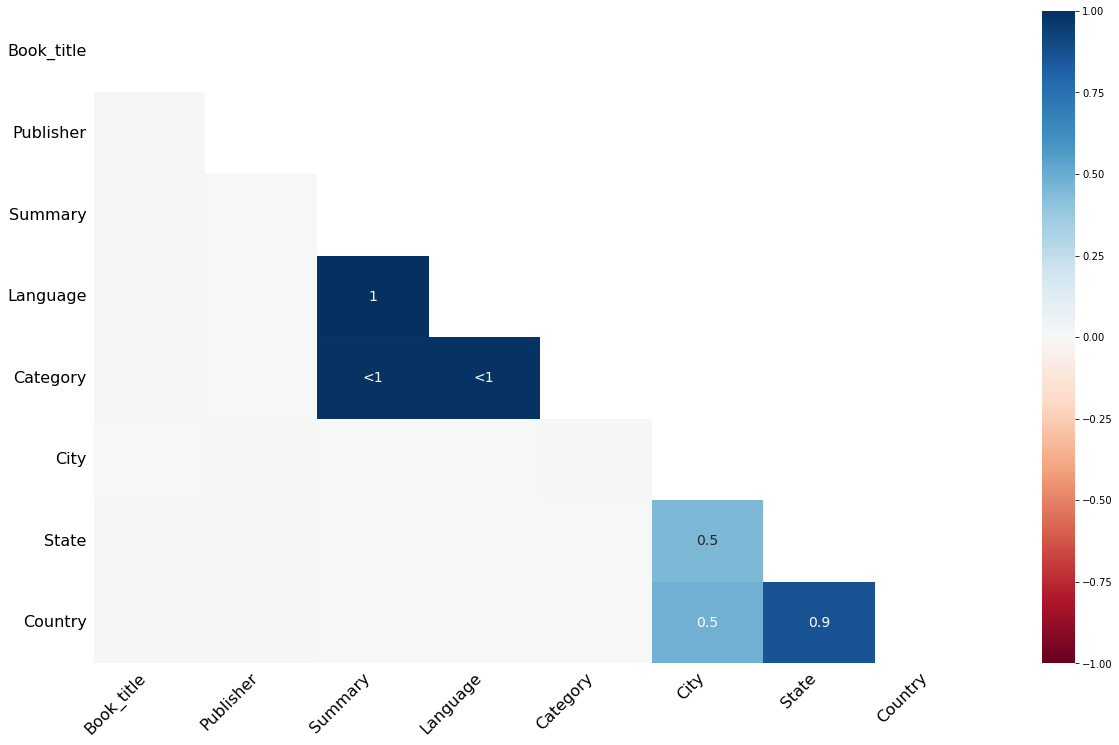

In [1516]:
# Plot missing values heatmap
msno.heatmap(dataset)
plt.show()

Here the only thing that changed is the correlation of missingness between the state and the country which increased to 0.9. 
This could point out to a potential bias in the dataset, meaning that if the country is correctly collected in the data there's only a 10% chance that the state is missing. This is pretty strange as States are only common in certain countries like in Australia or North American like the US or Canada. Which means that this dataset could contain mostly people from these countries and the dataset could lack a lot of geographical diversity.

Let's plot the top 10 most mentionned countries of this dataset and see if it confirms our thoughts: 

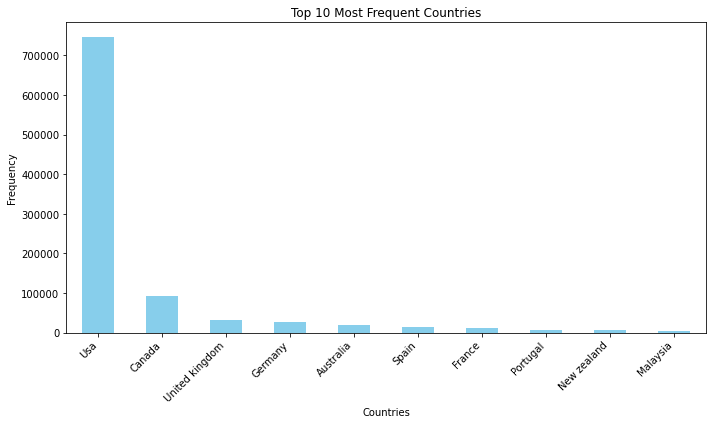

In [1517]:
top_10_countries = dataset['Country'].value_counts().head(10)
# Plot the 10 most frequent book titles
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Just like we predicted, most of the users in the dataset are from the usa and Canada. Let's see how much: 

In [1518]:
# Count the number of rows containing "USA" or "Canada"
us_canada_rows = dataset[dataset['Country'].isin(['Usa', 'Canada'])].shape[0]
# Calculate the total number of rows in the dataset
total_rows = dataset.shape[0]
# Calculate the percentage
percentage_us_canada = (us_canada_rows / total_rows) * 100

print(f"Percentage of rows containing 'USA' or 'Canada': {percentage_us_canada:.2f}%")

Percentage of rows containing 'USA' or 'Canada': 81.34%


Given that nearly 90% of our dataset comprises users from the US or Canada, we can enhance the efficiency and accuracy of our recommendation system by excluding rows where users are from other countries. This approach minimizes potential biases and ensures that recommendations are tailored specifically to users in the US and Canada.

This strategy aligns with common practices in recommendation systems, such as Netflix, which personalize recommendations based on the user's location rather than providing global suggestions. While worldwide recommendations are available, they typically rely on datasets that accurately represent each country equally, unlike the dataset we are currently using.

In [1519]:
# Filter rows where users are from "USA" or "Canada"
dataset = dataset[dataset['Country'].isin(['Usa', 'Canada'])]

Now let's see how much missing values we have left: 

In [1520]:
# I recalculated the number of missing values after filtering users from the US and Canada
missing_values = dataset.isna().sum() 
print("Number of missing values in each column:")
print(missing_values)

# I used the .sum() method to calculate the total number of missing values in the dataset
total_missing_values = missing_values.sum()
# I used the .shape[] method to get the total number of rows in the Dataset
total_entries = dataset.shape[0]*dataset.shape[1]
# Then I calculated the percentage using the two variables above 
percentage_missing_values = (total_missing_values / total_entries) * 100

print("Percentage of missing values in the dataset:")
print(percentage_missing_values)

Number of missing values in each column:
User_id                     0
Age                         0
Rating                      0
Book_title                182
Book_author                 0
Year_of_publication         0
Publisher                   2
Summary                305406
Language               305323
Category               308650
City                     1906
State                    3303
Country                     0
dtype: int64
Percentage of missing values in the dataset:
8.480753709456245


The overall decrease in the percentage of missing values by approximately 1% is a positive development. As anticipated, many missing values in the "city," "state," and "country" columns were successfully eliminated without losing any crucial information for our project.

For the remaining missing values in "Book_title", "city", "state" and "country" columns, combined, they are comprising less than 1% of our dataset. Hence, removing them entirely seems appropriate. This action is expected to avoid us complications in subsequent analyses.

Regarding the missing values in the recently added columns "Language," "Category," and "Summary," it's prudent to remove them as well. While imputing these values individually by sourcing information for each book online is beyond my current capabilities, in a different context where such resources are available, imputation would be a viable option.

I will also drop the "City" column as I won't be using it for my recommendation system and hopefully it will also help us eliminate some of the missing values without losing information.


In [1521]:
# drop "city" column from both datasets
dataset.drop(columns=['City'], inplace = True)

In [1522]:
dataset = dataset.dropna()

Let's now assess the impact of dropping these values on our dataset.

In [1523]:
dataset.shape

(527914, 12)

We've reduced the number of rows in our dataset by half. However, with approximately 500,000 observations remaining, it still represents a substantial amount of data, particularly given the scope of the project.

### Duplicates

Now let's check for duplicates: 

In [1524]:
dataset.duplicated().sum()

14

There are 14 duplicates, let's drop them.

In [1525]:
dataset = dataset.drop_duplicates()

Now let's see if all columns contain the right information in each entry. 



### Data Validation

In this part of the project we will be verifying that the data conforms to certain predefined criteria or constraints, ensuring its accuracy, consistency, and reliability for further analysis or processing.
Let's start with the age column.

In [1526]:
dataset.head()

,User_id,Age,Rating,Book_title,Book_author,Year_of_publication,Publisher,Summary,Language,Category,State,Country
0,2,18.0000,0,Classical mythology,Mark p. o. morford,2002.0,Oxford university press,Provides an introduction to classical myths pl...,En,['social science'],California,Usa
1,8,34.7439,5,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Ontario,Canada
2,11400,49.0000,0,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Ontario,Canada
4,41385,34.7439,0,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Ontario,Canada
5,67544,30.0000,8,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],Ontario,Canada


Let's examine whether the age column contains reasonable values, ensuring that the entries are numbers and fall within the range of 5 to 110 years old.

In [1527]:
# Print the data type of this column
print(dataset['Age'].dtypes)

# Filter out rows where the 'age' column falls outside the range [5, 100]
invalid_entries = dataset[(dataset['Age'] < 5) | (dataset['Age'] > 110)]

# Print invalid entries
print("Invalid entries:")
print(invalid_entries)

float64
Invalid entries:
Empty DataFrame
Columns: [User_id, Age, Rating, Book_title, Book_author, Year_of_publication, Publisher, Summary, Language, Category, State, Country]
Index: []


Perfect, all the data in this column is reasonable and float. Now let's see if the ratings are integers and between 0 and 10.

In [1528]:
# Print the data type of this column
print(dataset['Rating'].dtypes)

# Filter out rows where the 'rating' column falls outside the range [0, 10]
invalid_entries = dataset[(dataset['Rating'] < 0) | (dataset['Rating'] > 10)]

# Print invalid entries
print("Invalid entries:")
print(invalid_entries)

int64
Invalid entries:
Empty DataFrame
Columns: [User_id, Age, Rating, Book_title, Book_author, Year_of_publication, Publisher, Summary, Language, Category, State, Country]
Index: []


All the data in this column is reasonnable. However, the rating column type is float, let's convert it to integer:

In [1529]:
dataset['Rating'] = dataset['Rating'].astype(int)

and finally let's make sure that the year of publication is a plausible year:

In [1530]:
# Filter out rows where the 'age' column falls outside the range [5, 100]
invalid_entries = dataset[(dataset['Year_of_publication'] < 1300) | (dataset['Year_of_publication'] > 2021)]

# Print invalid entries
print("Invalid entries:")
print(invalid_entries)

Invalid entries:
Empty DataFrame
Columns: [User_id, Age, Rating, Book_title, Book_author, Year_of_publication, Publisher, Summary, Language, Category, State, Country]
Index: []


Now let's make sure the state column contains states. 
Before doing so let's lowercase all the entries to make it easier for us to remove the wrong states:

In [1531]:
dataset['State'] = dataset['State'].str.lower()

In [1532]:
us_states = {
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware',
    'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky',
    'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri',
    'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina',
    'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina',
    'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia',
    'wisconsin', 'wyoming'
}

# Check if each state abbreviation is valid
valid_states = us_states
invalid_states = set(dataset['State']) - valid_states
print("Invalid states:", invalid_states)

Invalid states: {'onataio', 'united states virgin islands', 'sc', 'hamburg', 'niagra falls', 'new brunswick', 'pa', 'south korea', 'oh', 'toscana', 'prince edward island', 'ron see comments pls ...', 'nj', 'mo', 'tn', 'guam', 'rio de janeiro', 'armed services europe', 'tejas', 'rheinland-pfalz', 'midwest', 'canada', 'western pennsylvania', 'ae', 'british  columbia', 'dc', 'northern territory', 'va', 'british columbia', 'n.j.', 'pella', 'ap', 'ok', 'illlinois', 'anywhere - usa', 'bc', 'manitoba', 'yedor', 'mi', 'montreal,quebec', 'tenessee', 'ma', 'northwest territories', 'england', 'unknown', 'new  york', 'minnasota', 'florida keys', 'nova scotia', 'queensland', 'wv', 'friuli venezia giulia', 'san diego', 'city', 'yukon', 'wales', 'ak.', 'ny', 'massachusattes', 'upstate new york', 'mississippi39571', 'ab', 'brithish columbia', 'wva', 'washington state', 'campania', 'veneto', 'anystateq', 'calabria', 'ar', 'virgin islands', 'id', 'aberta', 'lombardia', 'québec', 'ap (armed forces pacifi

In [1533]:
# List of Canadian provinces' abbreviations
canadian_provinces = {
    'alberta', 'british columbia', 'manitoba', 'new brunswick', 'newfoundland and labrador',
    'nova scotia', 'ontario', 'prince edward island', 'quebec', 'saskatchewan'
}


# Check if each entry in the "state" column is a valid Canadian province
invalid_provinces = invalid_states - canadian_provinces
print("Invalid provinces:", invalid_provinces)

Invalid provinces: {'onataio', 'yukon', 'united states virgin islands', 'wales', 'ak.', 'ny', 'massachusattes', 'upstate new york', 'mississippi39571', 'sc', 'ab', 'brithish columbia', 'wva', 'hamburg', 'niagra falls', 'washington state', 'pa', 'south korea', 'or', 'oh', 'toscana', 'campania', 'veneto', 'anystateq', 'calabria', 'ron see comments pls ...', 'nj', 'ar', 'mo', 'virgin islands', 'tn', 'guam', 'rio de janeiro', 'armed services europe', 'id', 'tejas', 'aberta', 'lombardia', 'québec', 'ap (armed forces pacific)', 'quit', 'rheinland-pfalz', 'co', 'armed forces europe', 'midwest', 'massachussetts', 'nm', 'n carolina', 'canada', 'western pennsylvania', 'nunavut', 'ae', 'ithaca', 'british  columbia', 'tasmania', 'baden-wuerttemberg', 'dc', 'callif', 'northern territory', 'ga.', 'va', 'georga', 'b.c', 'michigan/new jersey', 'n.j.', 'pella', 'ap', 'moving', 'ok', 'wa', 'private', 'new brunswick/alberta', 's. carolina', 'ca', 'illlinois', 'anywhere - usa', 'state of continuing flux',

As observed, numerous invalid states and provinces appear to be either incorrect entries or typographical errors. Since I lack the authority to manually rectify the dataset's spellings, I'll opt to eliminate all rows containing invalid entries despite its potential impact on our dataset. The removal of numerous observations that might have otherwise enhanced the precision of our recommendation system, but dropping them is a better option than keeping false values.

In [1534]:
# Create a boolean mask to identify rows with provinces listed in invalid_provinces
mask = dataset['State'].str.lower().isin(invalid_provinces)

# Drop rows with provinces listed in invalid_provinces
dataset = dataset[~mask]
dataset.shape

(523860, 12)

I will leave the responsiblity of the accuracy of other information, such as authors and book titles, to the data collectors, as my current capabilities do not allow me to analyze them comprehensively. 

## Data Vizualisation

Let's plot our variables and see if we can ge any insights on the data. 

In [1535]:
#numerical = dataset[['user_id','age','rating', 'year_of_publication']].copy()
#text = dataset[['book_title','book_author','publisher','Summary','Language','Category','city','city','country']].copy()

In [1536]:
import seaborn as sns

dataset.head()

,User_id,Age,Rating,Book_title,Book_author,Year_of_publication,Publisher,Summary,Language,Category,State,Country
0,2,18.0000,0,Classical mythology,Mark p. o. morford,2002.0,Oxford university press,Provides an introduction to classical myths pl...,En,['social science'],california,Usa
1,8,34.7439,5,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],ontario,Canada
2,11400,49.0000,0,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],ontario,Canada
4,41385,34.7439,0,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],ontario,Canada
5,67544,30.0000,8,Clara callan,Richard bruce wright,2001.0,Harperflamingo canada,"In a small town in canada, clara callan reluct...",En,['actresses'],ontario,Canada


Before we start plotting our variables, let's get a brief idea of how the data is distributed through the summary statistics. 

In [1537]:
dataset.describe()

,User_id,Age,Rating,Year_of_publication
count,523860.000000,523860.000000,523860.000000,523860.000000
mean,142692.147181,36.947742,2.732024,1995.754453
std,79644.819530,10.483978,3.828862,6.722098
min,2.000000,5.000000,0.000000,1901.000000
25%,73588.000000,31.000000,0.000000,1993.000000
50%,143763.000000,34.743900,0.000000,1997.000000
75%,212898.000000,43.000000,7.000000,2001.000000
max,278854.000000,99.000000,10.000000,2005.000000


Here we observe that the standard deviation is relatively small for both the "age" and "year of publication" variables. This indicates that the data is tightly clustered around the mean and may exhibit a distribution that is approximately normal, particularly if the distribution is reasonably symmetrical around the mean. However, for the "rating" variable, the standard deviation is notably high, suggesting a significant skewness in the data.

While the mean and standard deviation provide insight into the central tendency and variability of the data, they do not tell us about any trends or patterns over time. Further analysis, such as plotting the distribution of the variables or examining trends over time, may reveal more about the characteristics of the dataset.

Let's start by plotting the "Age" column:

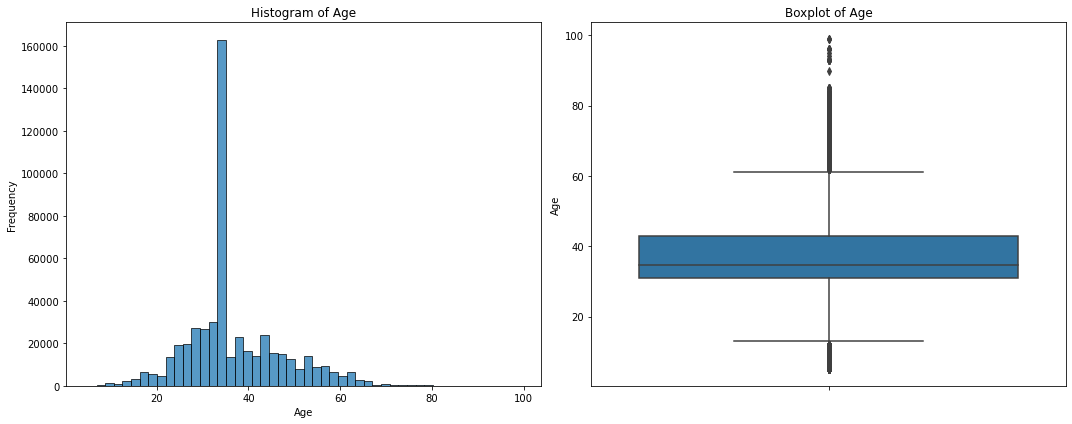

In [1538]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram of age
sns.histplot(data=dataset, x='Age', bins=50, ax=axes[0])
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot boxplot of age
sns.boxplot(data=dataset, y='Age', ax=axes[1])
axes[1].set_title('Boxplot of Age')
axes[1].set_ylabel('Age')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The distribution exhibits a rough symmetry around the mean; however, it is notably skewed to the left, likely due to outliers toward the higher values, as evident from the boxplot. 

After ensuring the reasonableness of all age entries such that they are between  the [5,110] range, and considering that the outliers do not appear strange in any discernible manner, I lack sufficient evidence to question their authenticity. Thus, I'll proceed under the assumption that they represent genuine observations from older individuals.

With this in mind, let's revisit the visualization of this column for more analysis:

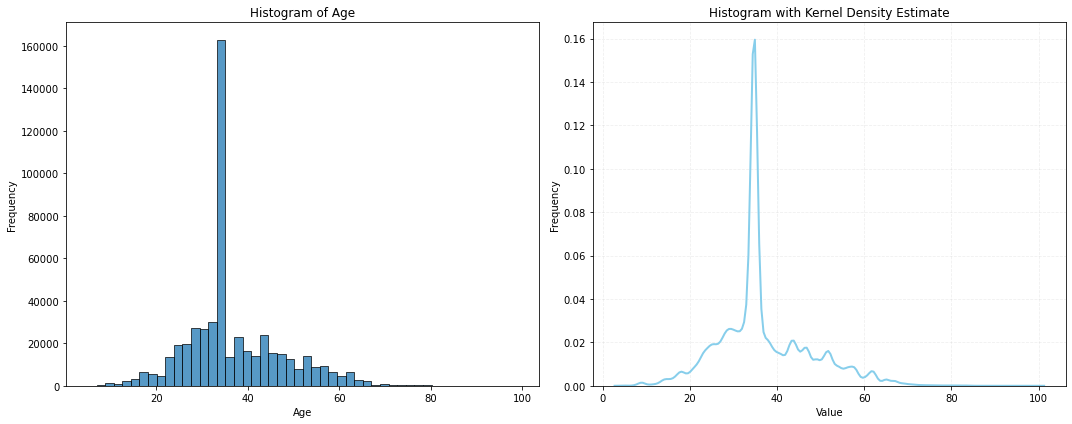

In [1539]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram of age
sns.histplot(data=dataset, x='Age', bins=50, ax=axes[0])
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot KDE plot of age
sns.kdeplot(data=dataset, x='Age', ax=axes[1], color='skyblue', linestyle='-', linewidth=2)
axes[1].set_title('Histogram with Kernel Density Estimate')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Again by plotting the KDE plot, we can clearly see here that it is not following a normal ditribution.
But we can still say that there is a relatively even spread of ages across the dataset, with a peak around the younger or middle-aged range.
This phenomenon likely stems from the nature of the data source being an online website. It's probable that older individuals and children are less inclined to provide book ratings on such platforms.

### Outliers

Now let's plot the distribution of the "year_of_publication" variable: 

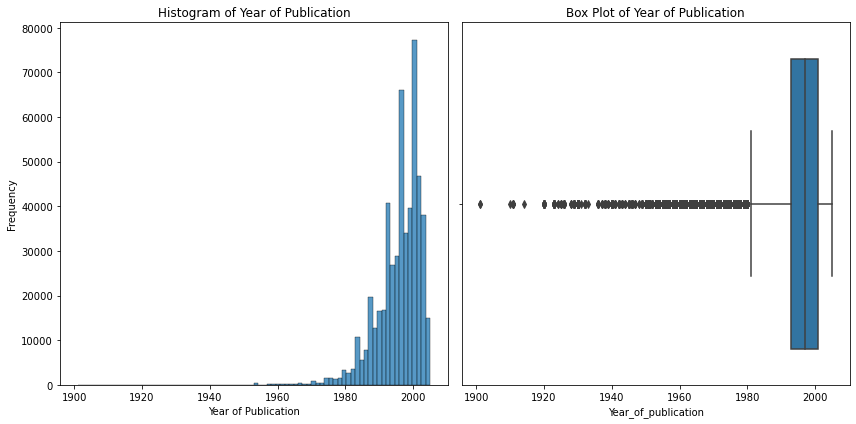

In [1540]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of year of publication
sns.histplot(data=dataset, x='Year_of_publication', bins=80, ax=axes[0])
axes[0].set_title('Histogram of Year of Publication')
axes[0].set_xlabel('Year of Publication')
axes[0].set_ylabel('Frequency')

# Plot box plot of year of publication
sns.boxplot(data=dataset, x='Year_of_publication', ax=axes[1])
axes[1].set_title('Box Plot of Year of Publication')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


Similar to the 'Age' column, the distribution of the 'Year_of_publication' column appears to be skewed too, but this time is more extreme. This skewness suggests the possibility of outliers, which could be the rare books shown in the boxplot that were rated by users and were published before the 1940s. 

This totally makes sense considering that the majority of popular books in our dataset are likely to have been published in recent years and so contemporary titles tend to receive more attention than those published several decades ago.


In [1541]:
# Filter out rows where the 'age' column falls outside the range [5, 100]
outliers = dataset[(dataset['Year_of_publication'] < 1902)]

# Print invalid entries
outliers.head()

,User_id,Age,Rating,Book_title,Book_author,Year_of_publication,Publisher,Summary,Language,Category,State,Country
830737,87141,34.7439,0,Last temp christcl,Nikos kazantzakis,1901.0,Simon & schuster,"Now a major motion picture, the last temptatio...",En,['bible'],california,Usa
962972,184299,31.0000,0,Dale crnegie scrpb,Dorothy carnegie,1901.0,Simon & schuster,Inspirational and practical advice on courage ...,En,"['conduct of life quotations, maxims, etc.']",nebraska,Usa


The publication year of 1901 is significantly earlier than typical publication years for books in this dataset. This could indicate a data entry error, a misinterpretation of historical data, or an outlier that needs further investigation.
Due to the intriguing nature of this date, I decided to do some research and these 2 books was actually published in 1955 and 1959 and not in 1901 which makes more sense. Their titles also contain some typos. Let's correct this information and replot: 

In [1542]:
book_row_index = dataset[dataset['Book_title'] == "Last temp christcl"].index[0]

# Update the year of publication for the book
dataset.at[book_row_index, 'Year_of_publication'] = 1955.0

# Update the name of the book
dataset.at[book_row_index, 'Book_title'] = "Last temp christ"


In [1543]:
book_row_index = dataset[dataset['Book_title'] == "Dale crnegie scrpb"].index[0]

# Update the year of publication for the book
dataset.at[book_row_index, 'Year_of_publication'] = 1959.0

# Update the name of the book
dataset.at[book_row_index, 'Book_title'] = "Dale Carnegie scrapbook"

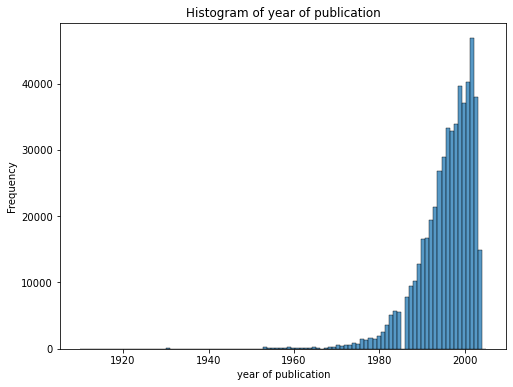

In [1544]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Year_of_publication', bins=100)  # Adjust the number of bins as needed
plt.title(f'Histogram of year of publication')
plt.xlabel('year of publication')
plt.ylabel('Frequency')
plt.show()

Now for the rest of the outliers, there isn't sufficient evidence to dismiss them, and since I can't inspect the correctedness of all their publication year, I will just assume that they stem from genuine observations by individuals with a penchant for older books—a niche demographic. Given that their presence is unlikely to significantly affect the performance of my recommender system, I've chosen to retain the data in its current state. Nonetheless, it's fascinating to glean insights from the various data distributions about the population.

The dataset remains right-skewed even after dealing with the extreme outliers, which is quite normal as the dataset was heavily skewed to begin with. Removing a single outlier may not completely alter the overall shape of the distribution, particularly since the dataset is particulary large and there are probably other values that contribute to the skewness. 

The dataset reveals that books rated by users predominantly originate from the 1940s onward, with a notable concentration of recent publications, particularly from the 2000s. This trend could stem from multiple factors, including a heightened interest in contemporary literature among readers, increased accessibility to digital records favoring recent publications, and potential shifts in publishing practices over time. Moreover, user preferences may play a role, with individuals more inclined to rate books aligned with modern themes and authors. Consequently, the distribution of publication years in the dataset reflects a dynamic interplay between evolving reader interests, publishing trends, and the availability of data.

### Data bias 

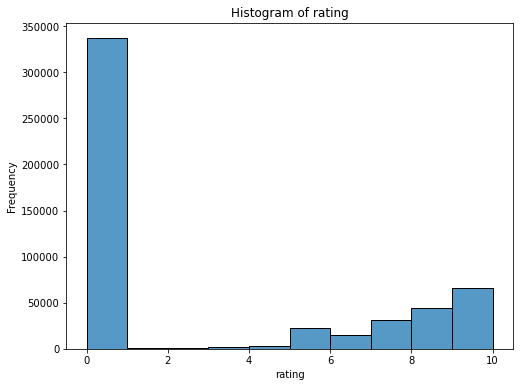

In [1545]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Rating', bins=10)  # Adjust the number of bins as needed
plt.title(f'Histogram of rating')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

The high frequency of 0/10 ratings may suggest that some users have strong negative opinions about certain books, leading them to rate them as low as possible. Conversely, the relatively low frequency of other ratings may indicate a lack of extreme positive opinions or a tendency for users to be more reserved in their ratings. This pattern could also be influenced by the phenomenon where individuals are more inclined to express their opinions, particularly negative ones, when it comes to books they disliked or found controversial. Negative emotions often evoke stronger responses and may prompt individuals to voice their opinions more readily compared to positive emotions.

Such a large gap in frequency could also be indicative of data quality issues. It's possible that there is bias, errors, or anomalies in the data, leading to an inflated number of 0/10 ratings. 
Given that the data was gathered from an online platform, there is limited oversight regarding the accuracy or sincerity of users' responses. It is plausible that users assign a 0 rating arbitrarily, particularly when prompted by the website to rate books they have downloaded but not yet read. Alternatively, the website might automatically assign a 0 rating if users opt not to provide a rating.

In [1546]:
# Step 1: Count the total number of ratings
total_ratings = len(dataset)

# Step 2: Count the number of 0 ratings in the 'rating' column
zero_ratings = (dataset['Rating'] == 0).sum()

# Step 3: Calculate the percentage of 0 ratings
percentage_zero_ratings = (zero_ratings / total_ratings) * 100

print(f"Percentage of 0 ratings in the 'rating' column: {percentage_zero_ratings:.2f}%")

Percentage of 0 ratings in the 'rating' column: 64.32%


As we can see, 64.32% of our dataset is constitued of 0/10 ratings.
Given the significant proportion of extremely low ratings in the dataset, which may be attributed to various factors including data quality issues, user behavior, or characteristics of the books, it's essential to address this issue even without the ability to collect more data or ensure the sincerity of users providing ratings. While we may not have a perfect solution, making assumptions and implementing changes to mitigate the impact of the 63% of ratings representing 0 is necessary to improve the overall quality of the dataset. Therefore, we will proceed with a little more investigation and then start some imputation,  to handle these low ratings while acknowledging the limitations and uncertainties associated with these approaches. Additionally, efforts to improve data quality and understand user behavior should be pursued in parallel to ensure the reliability and validity of future analyses.

Let's start by investigating the users that made these 0/10 ratings: 

In [1547]:
zero_rating_books = dataset[dataset['Rating'] == 0]

# Step 2: Group the filtered dataset by the category column and count occurrences
category_counts = zero_rating_books['User_id'].value_counts()

# Step 3: Sort the categories based on their frequency
sorted_categories = category_counts.sort_values(ascending=False)

# Step 4: Select the top 5 most common categories
top_5_categories = sorted_categories.head(5)

print("Top 5 most common categories for books with 0 ratings:")
print(top_5_categories)

Top 5 most common categories for books with 0 ratings:
198711    3910
35859     3032
212898    2643
153662    2643
278418    2273
Name: User_id, dtype: int64


Here we observe the top 5 users who assigned 0/10 ratings to books. It's notably peculiar that a single user accounts for 3,910 of these 0/10 ratings. Let's investigate this further by plotting the rating habits of this user.

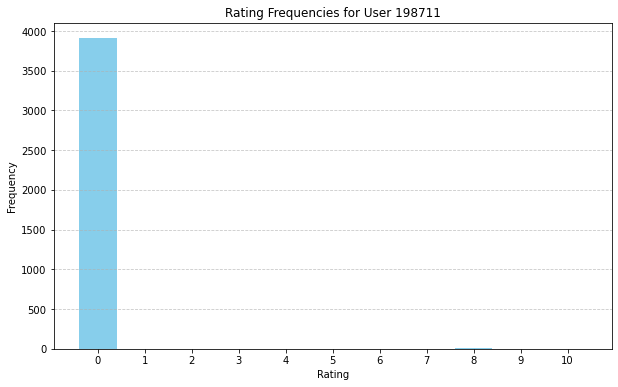

In [1548]:
# Step 1: Filter the dataset to include only ratings by the specific user
target_user_id = int(198711)
user_ratings = dataset[dataset['User_id'] == target_user_id]

# Step 2: Group the filtered dataset by the rating values and count occurrences
rating_frequencies = user_ratings['Rating'].value_counts().sort_index()

# Step 3: Plot the rating frequencies as a histogram
plt.figure(figsize=(10, 6))
plt.bar(rating_frequencies.index, rating_frequencies.values, color='skyblue')
plt.title(f'Rating Frequencies for User {target_user_id}')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [1549]:
print(rating_frequencies)

0     3910
4        2
6        1
7        1
8        7
10       1
Name: Rating, dtype: int64


Upon closer examination of this user's activity, we discovered that besides the 3910 "0/10" reviews, they also assigned 2 ratings of 4/10,  1 rating of 6/10, 1 rating of 7/10, 7 ratings of 8/10 and 1 rating of 10/10. Such behavior is highly unusual, given that over 99% of their ratings are 0/10. 
We also tried to plot the publisher that the user rated 0/10 the most.

In [1550]:
user_zero_ratings = dataset[(dataset['User_id'] == target_user_id) & (dataset['Rating'] == 0)]

# Step 2: Group the filtered dataset by the book titles and count occurrences
book_title_frequencies = user_zero_ratings['Publisher'].value_counts()

# Step 3: Display the frequencies of book titles
print("Book Title Frequencies for User {} with 0/10 ratings:".format(target_user_id))
print(book_title_frequencies)

Book Title Frequencies for User 198711 with 0/10 ratings:
Scholastic                       397
Harlequin                        198
Golden books                     120
Pocket                           100
Random house children's books     91
                                ... 
Marvel entertainment group         1
Smithmark publishers               1
Farrar straus giroux               1
Mcgraw hill children's pub         1
Planeta pub corp                   1
Name: Publisher, Length: 585, dtype: int64


Let's see if the other top 0/10 reviewers share the same characteristics: 

In [ ]:
# List of user IDs to plot histograms for
user_ids = [int(35859), int(153662), int(212898)]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over user IDs and plot histograms
for i, user_id in enumerate(user_ids):
    user_ratings = dataset[dataset['User_id'] == user_id]['Rating']
    axs[i].hist(user_ratings, bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of Ratings for User {user_id}')
    axs[i].set_xlabel('Rating')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

they follow they exact same pattern as the first user as over 95% of their ratings are 0/10.
We can also see that they rated 0/10 the most, pretty much the same publishers (see below) which might let us think that there either is some data collection or processing issues leading to inaccuracies in the ratings or that there could be a malicious intent behind the users' ratings. This mean that users may intentionally leave low ratings as a form of protest, retaliation, or trolling.This could be directed towards specific authors, publishers, or even the website itself.

In [ ]:
user_zero_ratings = dataset[(dataset['User_id'] == int(35859)) & (dataset['Rating'] == 0)]

# Step 2: Group the filtered dataset by the book titles and count occurrences
book_title_frequencies = user_zero_ratings['Publisher'].value_counts()

# Step 3: Display the frequencies of book titles
print("Book Title Frequencies for User {} with 0/10 ratings:".format(target_user_id))
print(book_title_frequencies)

In [ ]:
user_zero_ratings = dataset[(dataset['User_id'] == int(153662)) & (dataset['Rating'] == 0)]

# Step 2: Group the filtered dataset by the book titles and count occurrences
book_title_frequencies = user_zero_ratings['Publisher'].value_counts()

# Step 3: Display the frequencies of book titles
print("Book Title Frequencies for User {} with 0/10 ratings:".format(target_user_id))
print(book_title_frequencies)

In [ ]:
user_zero_ratings = dataset[(dataset['User_id'] == int(212898)) & (dataset['Rating'] == 0)]

# Step 2: Group the filtered dataset by the book titles and count occurrences
book_title_frequencies = user_zero_ratings['Publisher'].value_counts()

# Step 3: Display the frequencies of book titles
print("Book Title Frequencies for User {} with 0/10 ratings:".format(target_user_id))
print(book_title_frequencies)

Another hypothesis would be that there could be systemic biases in the dataset, such as a biased sample of users or books, that skew the ratings distribution towards lower values. 

In [ ]:
top_10_books = dataset['Book_title'].value_counts().head(10)
# Plot the 10 most frequent book titles
plt.figure(figsize=(10, 6))
top_10_books.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Book Titles')
plt.xlabel('Book Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_10_categories = dataset['Category'].value_counts().head(10)

# Plot the 10 most frequent book titles
plt.figure(figsize=(10, 6))
top_10_books.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As evident from the data, the fiction category is disproportionately represented, with the book "Wild Animus" also appearing frequently. This could suggest several possibilities: Perhaps the website hosts a large number of fiction titles, which may not align with the preferences of the users, resulting in numerous low ratings. Alternatively, popular books like "Wild Animus" might elicit polarized opinions, with a substantial portion of readers giving it low ratings. Given the significant presence of these books in the dataset, such factors could contribute to the abundance of low ratings.

In summary, the abundance of low ratings in the dataset can be attributed to either one or a mix of the following factors: they are including potential data collection or processing issues leading to inaccuracies, user behavior such as intentional low ratings, and content-related factors such as the disproportionate representation of fiction books and polarizing titles like "Wild Animus." 

Either way, the "rating" column is very important to build a good recommendation system, hence we have no choice but to find a way to deal with them. Let's so some imputation with the mean ratings and re-plot. 

In [ ]:
# Calculate the mean rating excluding 0/10 ratings
mean_rating = dataset[dataset['Rating'] > 0]['Rating'].mean()

# Impute 0/10 ratings with the mean rating
dataset.loc[dataset['Rating'] == 0, 'Rating'] = int(mean_rating)

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Imputed Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Now we have a more usual distribution of the data, as it is still highly left skewed, we can still try to normalize it even though it is not really necessary for the project. 

I will use the cox box transformation because it can automatically determine the best transformation parameter to make the data more normally distributed: 

In [ ]:
import numpy as np
from scipy.stats import boxcox

# Check for negative or zero values in the column (Box-Cox transformation requires strictly positive values)
if (dataset['Rating'] <= 0).any():
    # Add a constant to make all values positive
    dataset['Rating'] += abs(dataset['Rating'].min()) + 1

# Apply the Box-Cox transformation
transformed_ratings, lambda_value = boxcox(dataset['Rating'])

# Update the 'Rating' column with the transformed values
dataset['Transformed_Rating'] = transformed_ratings

# Print the lambda value used in the transformation
print("Lambda value:", lambda_value)

The lambda value returned by the Box-Cox transformation is approximately 2, it suggests that a square transformation was applied to the data. This means that each data point was raised to the power of 2.

Let's plot it again to see how it looks like now:

In [ ]:
# Plot histogram of transformed ratings
plt.figure(figsize=(8, 6))
sns.histplot(transformed_ratings, bins=100, kde=True)
plt.title('Histogram of Transformed Ratings')
plt.xlabel('Transformed Ratings')
plt.ylabel('Frequency')
plt.show()

While the transformation has made the distribution less skewed, it hasn't achieved a perfect normal distribution. But this seems quite alright considering the scope of the project.

## Sentiment Analysis

In this section, we will perfom some sentiment analysis on the summary section of the dataset to find out any hidden insights on the data: 

In [ ]:
dataset.head()

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
# Download NLTK resources
#nltk.download('vader_lexicon')
#nltk.download('stopwords')
#nltk.download('punkt')

Given the dataset's size, I'll opt to work with a random sample as performing sentiment analysis on the entire dataset would exceed my computational capacities.

In [ ]:
# Take a random sample of the dataset
random_sample = dataset.sample(n=100000, random_state=42) 
random_sample['Rating'] = random_sample['Rating'].astype(int)


In [ ]:
# Step 1: Tokenization
random_sample['clean_summary'] = random_sample['Summary'].apply(word_tokenize)

In [ ]:
# Step 2: Convert to lowercase and remove punctuation
random_sample['clean_summary'] = random_sample['clean_summary'].apply(lambda x: [word.lower() for word in x if word.isalpha()])

In [ ]:
# Step 3: Remove stopwords
stop_words = set(stopwords.words('english'))
random_sample['clean_summary'] = random_sample['clean_summary'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Step 4: Join tokens back into a single string
random_sample['clean_summary'] = random_sample['clean_summary'].apply(lambda x: ' '.join(x))

In [ ]:
# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()
random_sample['sentiment_score'] = random_sample['clean_summary'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
# Categorize the summaries into positive and negative based on sentiment score
random_sample['sentiment_category'] = random_sample['sentiment_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')

Now I have successfully performed sentiment analysis on the Summary column of my dataset and then classified the column into two categories: Negative sentiment and Positive sentiment.

The goal here is to find out if there is any correlation between the rating the users wrote and the sentiment of the book, so i will plot the average sentiment score in each rating category and vizualise the relationship:

In [ ]:
# Create a countplot for all ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=random_sample, x='Rating', hue='sentiment_category', palette={'positive': 'green', 'negative': 'red'})
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
# Calculate average sentiment score for each rating category
average_sentiment_by_rating = random_sample.groupby('Rating')['sentiment_score'].mean().reset_index()

# Plot the relationship between ratings and average sentiment score
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_sentiment_by_rating, x='Rating', y='sentiment_score', marker='o')
plt.title('Relationship between Ratings and Average Sentiment Score')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

In the plot, we observe a trend where lower ratings (1-3) tend to correspond to higher average sentiment scores, indicating that books receiving lower ratings are associated with more positive sentiment. As the ratings increase to 4 and 5, the average sentiment score decreases to near zero. This trend aligns with expectations, as higher ratings typically suggest a more neutral or satisfactory opinion towards the book, resulting in lower sentiment scores.

Moreover, we notice another increase in average sentiment scores as ratings approach their highest values (6-10). This uptick suggests that books receiving higher ratings tend to elicit stronger positive sentiments from readers.

However, it's important to note that the overall average sentiment score across all rating categories is relatively low. This implies that while there are instances of both positive and negative sentiment across all rating categories, the sentiment conveyed by a book may not strongly influence the rating given by users. Instead, user ratings appear to be driven more by personal preference or other factors beyond the sentiment conveyed by the book.


We can further explore by plotting the average sentiment score against the year of publication, providing insights into how the authors and trends of books have evolved over time.

In [ ]:
# Calculate the average sentiment score for books published in each year
average_sentiment_by_year = random_sample.groupby('Year_of_publication')['sentiment_score'].mean()

# Plot the average sentiment scores
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_sentiment_by_year)
plt.title('Average Sentiment Score by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

it's fascinating to observe the evolution of sentiments depicted in books over time. Initially, we see a wide range of sentiments, ranging from strongly negative (close to -1) to strongly positive (up to +0.75). However, as we progress through the years, particularly by the 1980s, there is a noticeable shift towards more neutral sentiments, with the majority of books hovering around a sentiment score of 0.0. 

This transition may reflect changing societal attitudes, literary trends, or shifts in authorial perspectives across different eras. For example it is noteable that during the 1920s and the 1940 happened the great economic depression and the world war II, which could explain why there was such strong negative sentiment books published during that time.

We can even try to plot the sentiment scores of the most popular books in this dataset to see if popularity is related to the sentiment: 

In [ ]:
# Calculate popularity based on the number of ratings
popularity = random_sample['Book_title'].value_counts()

# Select the top 10 most popular books
top_10_books = popularity.head(10).index

# Calculate the average sentiment score for each of the top 10 books
average_sentiment = []
for book_title in top_10_books:
    avg_sentiment = random_sample[random_sample['Book_title'] == book_title]['sentiment_score'].mean()
    average_sentiment.append(avg_sentiment)

# Plot the average sentiment score for each book
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_books, y=average_sentiment, palette='viridis')
plt.title('Average Sentiment Score of Top 10 Most Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Book Recommendation System

Now we can start building our recommendation system, we will start by some user-based filtering and then some content-based filtering: 

## User-Based filtering

This approach recommends items to users based on the preferences of similar users. It identifies users who have similar preferences or behaviors and recommends items that those similar users have liked or interacted with.

Here again, I will start by taking a new sample of my original dataset because I cannot use a big sample size due to my limited computatonal capacities: 

In [ ]:
# Take a random sample of the dataset
random_sample2 = random_sample.sample(n=10000, random_state=51)  
random_sample2.head()

I chose to perfom a user-based filtering model to generate recommendations for a given user (here i used the user_id 30487 for the example) based on the cosine similarity between users. 


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Compute User Similarity Matrix
user_item_matrix = random_sample2.pivot_table(index='User_id', columns='Book_title', values='Rating').fillna(0)
user_similarity = cosine_similarity(user_item_matrix)

# Step 2: Find Similar Users
def get_similar_users(user_id, user_similarity_matrix, n_similar_users=10):
    user_index = user_item_matrix.index.get_loc(user_id)
    similar_users_indices = user_similarity_matrix[user_index].argsort()[::-1][1:n_similar_users+1]
    similar_users = user_item_matrix.iloc[similar_users_indices].index.tolist()
    return similar_users

# Step 3: Generate Recommendations
def generate_recommendations(user_id, similar_users, n_recommendations=10):
    user_ratings = user_item_matrix.loc[user_id]
    similar_users_ratings = user_item_matrix.loc[similar_users]
    # Compute mean ratings of similar users
    similar_users_mean_ratings = similar_users_ratings.mean(axis=0)
    # Filter items that the user hasn't interacted with
    unseen_items = user_ratings[user_ratings == 0].index
    # Get top N recommendations based on mean ratings of similar users
    recommendations = similar_users_mean_ratings[unseen_items].sort_values(ascending=False)[:n_recommendations]
    # Convert recommendations to DataFrame
    recommendations_df = pd.DataFrame({'Book_title': recommendations.index, 'recommendation_score': recommendations.values})
    return recommendations_df

# Example: Generate recommendations for a user
user_id = 21014  # User ID for whom recommendations will be generated
similar_users = get_similar_users(user_id, user_similarity)
recommendations = generate_recommendations(user_id, similar_users)
recommendations.head(10)

Here we can see the top 10 books recommended for this user, each one with a specific recommendation score, which is pretty high for all books, hinting that our recommendation system is working properly. 

This can likely be attributed to my decision to restrict the dataset to users exclusively from the USA and Canada, which results in a more focused recommendation system, offering more tailored choices to users.

Let's now properly evaluate its performance:

## Evaluation

In [ ]:
def evaluate_recommendations(recommended_books, relevant_books):
    recommended_set = set(recommended_books['Book_title'])
    relevant_set = set(relevant_books['Book_title'])
    
    # Calculate precision
    precision = len(recommended_set.intersection(relevant_set)) / len(recommended_set)
    
    # Calculate recall
    recall = len(recommended_set.intersection(relevant_set)) / len(relevant_set)
    
    return precision, recall

# Example usage:
precision, recall = evaluate_recommendations(recommendations, random_sample)
print("Precision:", precision)
print("Recall:", recall)


Precision indicates the proportion of correctly recommended items among all the items recommended. A precision of 1.0 means that all recommended items were relevant to the user.

Recall, on the other hand, measures the proportion of relevant items that were successfully recommended. A recall of 0.001 indicates that only a very small fraction of relevant items were successfully recommended.

While achieving a precision of 1.0 is desirable, the low recall suggests that the recommendation system may not be effectively capturing all relevant items for the user. This could be due to the fact that i am only recommending 10 books out of the whole dataset. Increasing that number significantly increases the recall.

## Content-Based Filtering 

This approach recommends books to users based on the features of the items and the user's preferences. It focuses on the content of the items and matches them to the user's profile. For example, it might recommend books with similar topics, genres, or authors to those the user has previously liked.

The features I chose are: the book titles, book authors, book categories

We will change the features if we see that they aren't much relevant for recommendations, and chose new ones to increase the recommendation scores: 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# 2. Feature Extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(random_sample2['Book_title'] + random_sample2['Book_author']  + random_sample2['Category'])

# 3. User Profiling
user_profiles = {}
for user_id, user_data in random_sample.groupby('User_id'):
    user_vector = tfidf_vectorizer.transform(user_data['Book_title'] + user_data['Book_author'] + user_data['clean_summary'])
    user_profile = user_vector.mean(axis=0)
    user_profiles[user_id] = user_profile


def recommend_books(user_id, n_recommendations=10):
    user_profile = user_profiles[user_id]
    similarity_scores = cosine_similarity(user_profile, tfidf_matrix)
    top_indices = similarity_scores.argsort(axis=1)[0][-2*n_recommendations:][::-1]  # Fetch double the recommendations
    recommended_books = random_sample.iloc[top_indices]
    recommended_books['recommendation_score'] = similarity_scores[0, top_indices]  # Add recommendation scores
    recommended_books = recommended_books[['Book_title', 'recommendation_score']]  # Selecting relevant columns
    # Remove duplicate entries and keep only unique books with highest recommendation scores
    recommended_books = recommended_books.drop_duplicates(subset=['Book_title']).sort_values(by='recommendation_score', ascending=False)
    # Ensure that we still have exactly n_recommendations after dropping duplicates
    recommended_books = recommended_books.head(n_recommendations)
    return recommended_books

# Example: Generate recommendations for a user
user_id = 21014
recommended_books = recommend_books(user_id)
recommended_books.head(10)

The recommendation scores are pretty low, so let's change the features and see what happens. 

Instead of using book categories as feature, let's use book summaries instead. 

Since we have already processed and cleaned the summaries it will be easy for us to include it here: 

In [ ]:
# 2. Feature Extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(random_sample2['Book_title'] + random_sample2['Book_author']  + random_sample2['clean_summary'])

# 3. User Profiling
user_profiles = {}
for user_id, user_data in random_sample.groupby('User_id'):
    user_vector = tfidf_vectorizer.transform(user_data['Book_title'] + user_data['Book_author'] + user_data['clean_summary'])
    user_profile = user_vector.mean(axis=0)
    user_profiles[user_id] = user_profile


def recommend_books(user_id, n_recommendations=10):
    user_profile = user_profiles[user_id]
    similarity_scores = cosine_similarity(user_profile, tfidf_matrix)
    top_indices = similarity_scores.argsort(axis=1)[0][-2*n_recommendations:][::-1]  # Fetch double the recommendations
    recommended_books = random_sample.iloc[top_indices]
    recommended_books['recommendation_score'] = similarity_scores[0, top_indices]  # Add recommendation scores
    recommended_books = recommended_books[['Book_title', 'recommendation_score']]  # Selecting relevant columns
    # Remove duplicate entries and keep only unique books with highest recommendation scores
    recommended_books = recommended_books.drop_duplicates(subset=['Book_title']).sort_values(by='recommendation_score', ascending=False)
    # Ensure that we still have exactly n_recommendations after dropping duplicates
    recommended_books = recommended_books.head(n_recommendations)
    return recommended_books

# Example: Generate recommendations for a user
user_id = 21014
recommended_books = recommend_books(user_id)
recommended_books.head(10)

Good for us, the recommendation scores increased a little more, let's leave it this way. 

## Evaluation

In [ ]:
def evaluate_recommendations(recommended_books, relevant_books):
    recommended_set = set(recommended_books['Book_title'])
    relevant_set = set(relevant_books['Book_title'])
    
    # Calculate precision
    precision = len(recommended_set.intersection(relevant_set)) / len(recommended_set)
    
    # Calculate recall
    recall = len(recommended_set.intersection(relevant_set)) / len(relevant_set)
    
    return precision, recall

# Example: recommended_books is the DataFrame containing recommended books,
# and relevant_books is the DataFrame containing relevant books (ground truth).
precision, recall = evaluate_recommendations(recommended_books, random_sample)
print("Precision:", precision)
print("Recall:", recall)

Again, just like the user-based filtering, the precision is 1.0 and the recall is very low, but it is probably due to recommending only 10 books only over 10000 books.

## Hybridization Strategy:

Hybrid recommendation systems can be designed to adapt to different user preferences and recommendation contexts. By incorporating multiple recommendation strategies, the system can tailor recommendations based on user behavior, item attributes, and contextual factors, leading to a more personalized user experience.


The first strategy would be to perform both user-based and content-based filtering and just select any common books between the two types of recommendations. If there are no common books between the two, we can just proceed with the second strategy.

The second strategy would be to create a function that selects the recommendation technique (content-based or user-based filtering) based on the number of interactions the user has, and then returns the recommended books accordingly.

User-based filtering leverages user-item interactions across the entire user base to identify similar users and generate recommendations based on their preferences. This approach requires a substantial amount of interaction data to effectively identify patterns and similarities between users. When a user has a significant number of interactions surpassing a certain threshold, user-based filtering is more likely to offer accurate and diverse recommendations by harnessing the collective preferences of the user community. However, when it not surpassing the threshhold, content-based filtering will be used.

In [ ]:
#First strategy

# Convert the book titles from both recommendation sets to sets
recommendations_set = set(recommendations['Book_title'])
recommended_books_set = set(recommended_books['Book_title'])

# Find common books between the two sets
common_books = recommendations_set.intersection(recommended_books_set)

# Convert the common books back to a DataFrame if needed
common_books_df = pd.DataFrame({'Book_title': list(common_books)})

# Display the common books
print(common_books_df)

In [ ]:
#Second Strategy

def get_num_interactions(user_id):
    """
    Calculate the number of interactions for a given user.
    """
    num_interactions = random_sample[random_sample['User_id'] == user_id].shape[0]
    return num_interactions


def recommend_books(user_id):
    # Check the number of interactions for the user
    num_interactions = get_num_interactions(user_id)  # Function to get the number of interactions
    
    # Set a threshold to determine when to switch techniques
    interaction_threshold = 50
    
    # If the user has fewer interactions, use content-based filtering
    if num_interactions < interaction_threshold:
        return recommended_books  # Function for content-based recommendation
    else:
        return recommendations  # Function for collaborative filtering recommendation

# Example usage
user_id = 21014
final_recommendation = recommend_books(user_id)
final_recommendation.head(10)

## Conclusion

n this project, we embarked on a comprehensive journey to develop and evaluate a recommendation system tailored to the needs of our users. Beginning with exploratory data analysis (EDA), we meticulously scrutinized the dataset, addressing missing values, outliers, and anomalies or errors to ensure data integrity and reliability.Then we meticulously plotted the variables and the relationships between variable to try and gain the most insights on our data as possible. Additionally, we conducted sentiment analysis to gain insights into user preferences and emotions towards the content.

Our recommendation system employed two fundamental approaches: user-based filtering and content-based filtering. Through rigorous evaluation, both models exhibited commendable precision scores of 1.0. However, the recall metric, although modest at 0.001 initially, improved significantly when we increased the number of recommended books. This observation underscores the importance of considering the entire breadth of the dataset when evaluating recommendation system performance.

To further optimize our system, we strategically refined the features used in content-based filtering, resulting in enhanced recommendation scores for certain books. Leveraging a hybridization strategy, we combined the strengths of both filtering approaches, ensuring robust recommendations that encompassed diverse user preferences and content attributes. In instances where common recommendations were absent, we dynamically selected the most suitable filtering method based on user interaction thresholds, recognizing that user-based filtering excels with ample user engagement.

Beyond the technical enhancements, our project underscores the iterative nature of recommendation system development. Continual refinement and adaptation are essential to meet evolving user needs and preferences. Future directions may involve exploring advanced modeling techniques, integrating additional data sources, or implementing real-time feedback mechanisms to further enhance recommendation accuracy and user satisfaction.

